In [376]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")
# sns.set_style("darkgrid")
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [377]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("downstream_analysis/DARs/" + y + "/*__DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("downstream_analysis/DARs/*"))]
}
dar_path_dict_dict

{'10xmultiome_celltypefair_1.FIXEDCELLS': {'B_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__B_cell__DARs.bed',
  'CD14+_monocyte': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bed',
  'CD16+_monocyte': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.bed',
  'CD4+_T_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.bed',
  'Cytotoxic_T_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed',
  'Dendritic_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1.FIXEDCELLS/10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.bed',
  'Natural_killer_cell': 'downstream_analysis/DARs/10xmultiome_celltypefair_1

In [378]:
df_merged = pd.DataFrame()
df_merged_10k = pd.DataFrame()
df_lens = pd.DataFrame()
for sample, dar_path_dict in dar_path_dict_dict.items():
    print(sample)
    for cell_type, dar_path in dar_path_dict.items():
        print(cell_type)
        df = pd.read_csv(dar_path, sep="\t", header=None)
        df["sample"] = sample
        df_merged = pd.concat([df_merged, df.iloc[:2000]])
        df_merged_10k = pd.concat([df_merged_10k, df.iloc[:10000]])
        df_lens.at[sample, cell_type] = len(df)

10xmultiome_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
10xv11_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
10xv1_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
10xv2_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
ddseq_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
hydrop_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
mtscatac_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell
s3atac_celltypefair_1.FIXEDCELLS
B_cell
CD14+_monocyte
CD1

In [379]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]
df_merged_10k.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [380]:
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]
df_merged_10k["tech"] = [x.split("_")[0] for x in df_merged_10k["sample"]]

In [381]:
df_merged_10k.groupby("tech")["cell_type"].value_counts()

tech         cell_type          
10xmultiome  B_cell                 10000
             CD14+_monocyte         10000
             CD16+_monocyte         10000
             Dendritic_cell         10000
             CD4+_T_cell             8120
             Cytotoxic_T_cell        8114
             Natural_killer_cell     6471
10xv1        B_cell                 10000
             CD14+_monocyte         10000
             CD16+_monocyte         10000
             Cytotoxic_T_cell       10000
             Dendritic_cell         10000
             CD4+_T_cell             8215
             Natural_killer_cell     7741
10xv11       B_cell                 10000
             CD14+_monocyte         10000
             CD16+_monocyte         10000
             Cytotoxic_T_cell       10000
             Dendritic_cell         10000
             Natural_killer_cell     8089
             CD4+_T_cell             8042
10xv2        B_cell                 10000
             CD14+_monocyte         10000
 

In [382]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

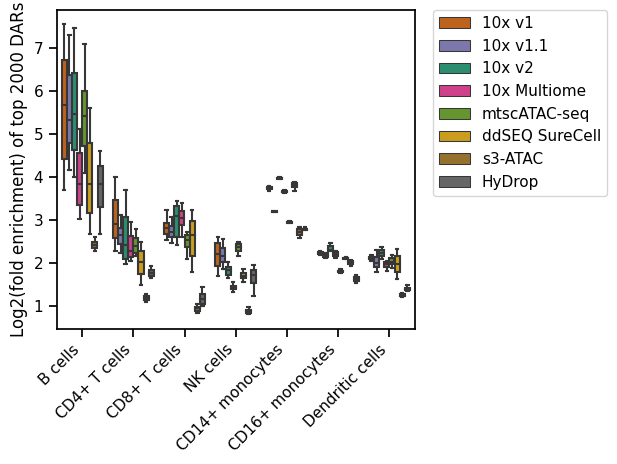

In [383]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

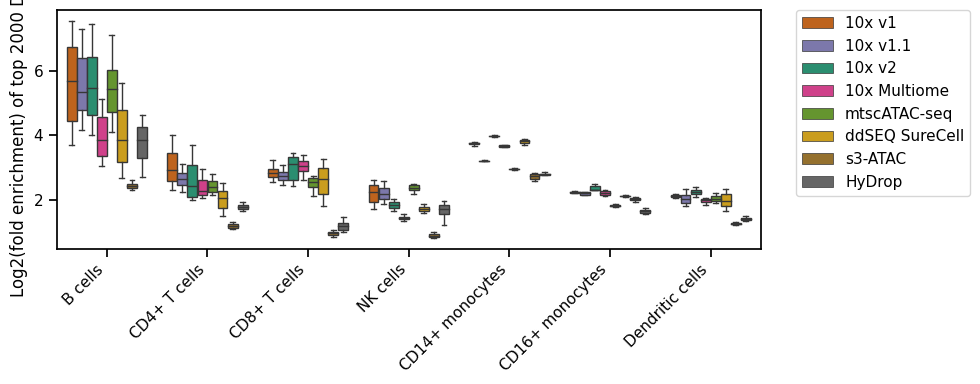

In [384]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    linewidth=1,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_logfc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_logfc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

In [385]:
df_merged["fc"] = 2 ** df_merged["logfc"]

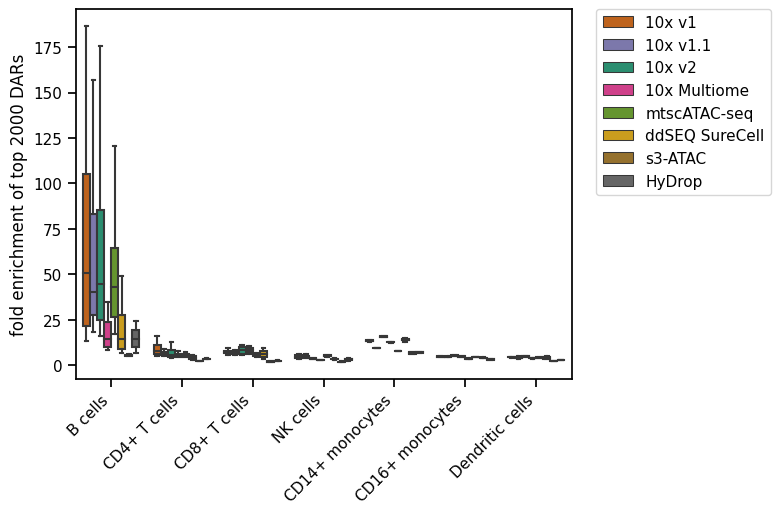

In [386]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="fc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("fold enrichment of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
# plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

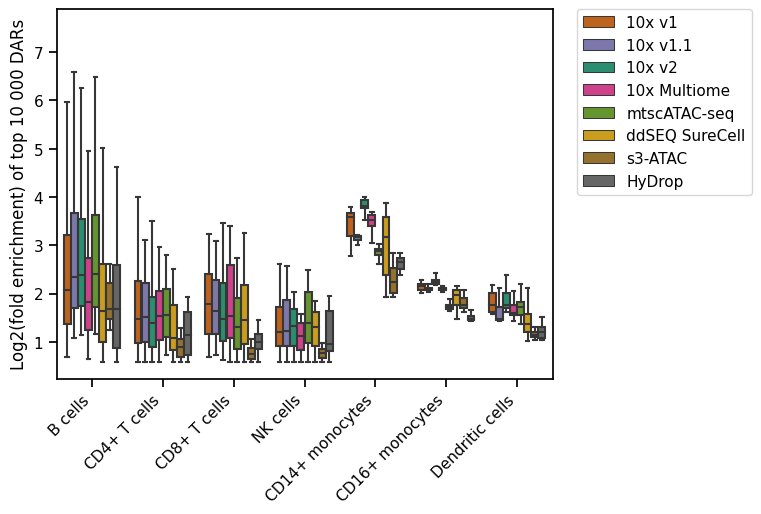

In [387]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged_10k,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 10 000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
# plt.tight_layout()
# plt.savefig(
#     "plts_final/FIXEDCELLS__top10k_DARs_logfc.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top10k_DARs_logfc.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

# pivoted heatmap

In [388]:
df_merged_pivot = df_merged.pivot_table(
    values="logfc", index="tech", columns="cell_type", aggfunc="median"
)
df_merged_pivot = df_merged_pivot.loc[tech_order]
df_merged_pivot = df_merged_pivot[cell_type_order]

df_merged_pivot.index = [tech_alias_dict[x] for x in df_merged_pivot.index]

df_merged_pivot.columns = [cell_type_alias_dict[x] for x in df_merged_pivot.columns]

In [389]:
df_merged_pivot

,B cells,CD4+ T cells,CD8+ T cells,NK cells,CD14+ monocytes,CD16+ monocytes,Dendritic cells
10x v1,5.664408,2.905426,2.821804,2.223473,3.747263,2.226693,2.108290
10x v1.1,5.334943,2.650302,2.723493,2.175836,3.199360,2.194950,2.005427
10x v2,5.472094,2.432296,3.095187,1.832132,3.972217,2.307177,2.245590
10x Multiome,3.844759,2.276753,3.048900,1.429891,3.660674,2.215788,1.991630
mtscATAC-seq,5.429889,2.405876,2.545160,2.369649,2.948940,1.806223,2.028051
ddSEQ SureCell,3.838991,2.036696,2.646857,1.712441,3.812028,2.115012,1.970235
s3-ATAC,2.412932,1.178967,0.953319,0.884662,2.721162,2.020399,1.247453
HyDrop,3.839368,1.767611,1.168178,1.720193,2.794902,1.632655,1.397485


In [390]:
cell_type_alias_dict

{'B_cell': 'B cells',
 'CD14+_monocyte': 'CD14+ monocytes',
 'CD4+_T_cell': 'CD4+ T cells',
 'Cytotoxic_T_cell': 'CD8+ T cells',
 'Dendritic_cell': 'Dendritic cells',
 'Natural_killer_cell': 'NK cells',
 'CD16+_monocyte': 'CD16+ monocytes'}

### in real values

In [391]:
from sklearn.preprocessing import minmax_scale

In [392]:
df_merged_pivot_abs = 2**df_merged_pivot

df_merged_pivot_abs_normalized = df_merged_pivot_abs.transform(
    lambda x: minmax_scale(x.astype(float))
)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'B cells'),
  Text(1.5, 0, 'CD4+ T cells'),
  Text(2.5, 0, 'CD8+ T cells'),
  Text(3.5, 0, 'NK cells'),
  Text(4.5, 0, 'CD14+ monocytes'),
  Text(5.5, 0, 'CD16+ monocytes'),
  Text(6.5, 0, 'Dendritic cells')])

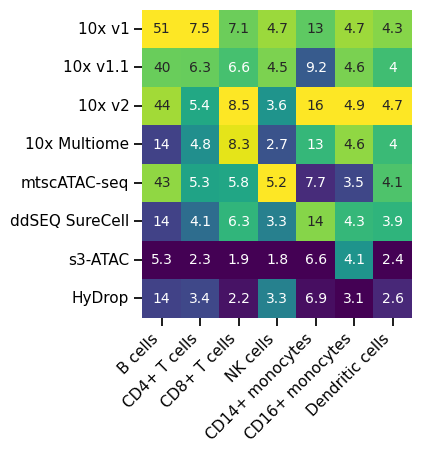

In [393]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_merged_pivot_abs_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_merged_pivot_abs,
    annot_kws={"fontsize": 10},
    cbar=False,
)
plt.xticks(rotation=45, ha="right")

# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
# plt.title("Fold change enrichment of\n2000 strongest DARs")
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc_heatmap.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__top2k_DARs_fc_heatmap.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )

# n_DARs

In [394]:
df_lens.index = [x.split("_")[0] for x in df_lens.index]

In [395]:
df_lens = df_lens.loc[tech_order]
# df_lens = df_lens[cell_type_order]

# df_lens.index = [tech_alias_dict[x] for x in df_lens.index]

# df_lens.columns = [cell_type_alias_dict[x] for x in df_lens.columns]
df_lens_normalized = df_lens.transform(lambda x: minmax_scale(x.astype(float)))

In [396]:
df_lens

,B_cell,CD14+_monocyte,CD16+_monocyte,CD4+_T_cell,Cytotoxic_T_cell,Dendritic_cell,Natural_killer_cell
10xv1,10434.0,21596.0,21681.0,8215.0,10717.0,22482.0,7741.0
10xv11,12019.0,26157.0,26435.0,8042.0,10950.0,28129.0,8089.0
10xv2,12388.0,24652.0,24953.0,9114.0,10267.0,27012.0,7182.0
10xmultiome,10236.0,22890.0,22956.0,8120.0,8114.0,24718.0,6471.0
mtscatac,12392.0,33704.0,33968.0,11051.0,9534.0,34768.0,9736.0
ddseq,8391.0,15925.0,16113.0,5900.0,5986.0,17304.0,6536.0
s3atac,14716.0,33062.0,33036.0,10215.0,7064.0,34977.0,6008.0
hydrop,8396.0,27094.0,26321.0,8923.0,4088.0,28625.0,5234.0


<AxesSubplot: >

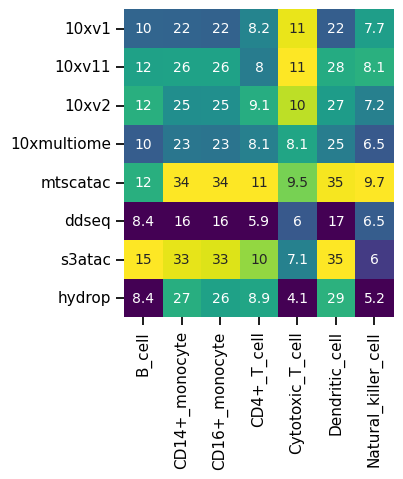

In [397]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(
    data=df_lens_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_lens / 1000,
    annot_kws={"fontsize": 10},
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

# plt.xticks(rotation=45, ha="right")
# plt.title("Number of DARs (x1000)")
# plt.savefig(
#     "plts_final/FIXEDCELLS__ndars_heatmap.png",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )
# plt.savefig(
#     "plts_final/FIXEDCELLS__ndars_heatmap.svg",
#     dpi=600,
#     facecolor="white",
#     bbox_inches="tight",
# )